# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('./Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [5]:
# your answer here
tempNYS = temp[temp['State'].isin (['New York'])]
tempNYS

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
tempNYS.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp_more15 = temp[temp['Temperature']>15 ]
temp_more15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp_cities_more15 = temp.City[temp['Temperature']>15 ]
temp_cities_more15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
cond = (temp['Temperature']>15) & (temp['Temperature']<20)
temp_cities_more15 = temp.City[(cond)]
temp_cities_more15

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
temp_mean_state = temp.groupby(["State"])["Temperature"].mean()
temp_stdv_state = temp.groupby(["State"])["Temperature"].std()
print(temp_mean_state)
print(temp_stdv_state)

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('./employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.info()
employee.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

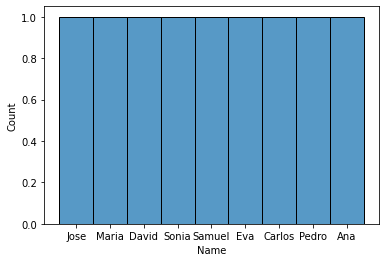

In [69]:
sns.histplot(employee.Name);

There is no names repeated in the company´s employees

<AxesSubplot:xlabel='Department', ylabel='Count'>

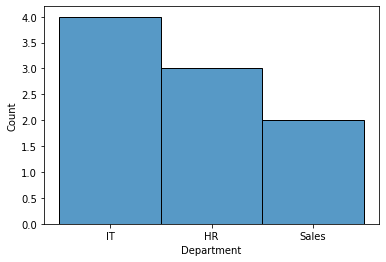

In [58]:
sns.histplot(employee.Department)

IT is the biggest department with 4 employees, then HR with 3, then Sales with 2.

<AxesSubplot:xlabel='Education', ylabel='Count'>

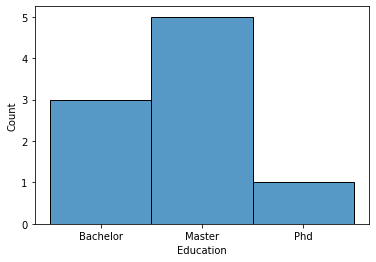

In [70]:
sns.histplot(employee.Education)

The most common level of education is Master education, then Bachelor, then Phd

<AxesSubplot:xlabel='Gender', ylabel='Count'>

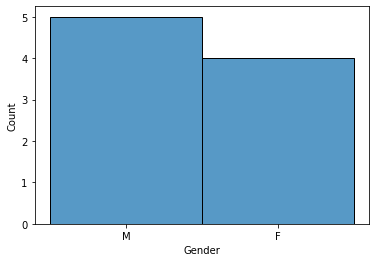

In [60]:
sns.histplot(employee.Gender)

<AxesSubplot:xlabel='Title', ylabel='Count'>

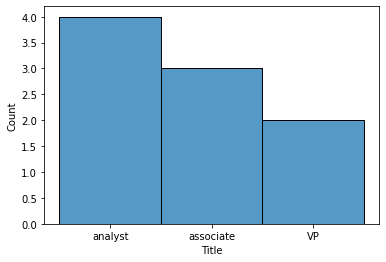

In [61]:
sns.histplot(employee.Title)

The most common job title is analyst

<AxesSubplot:xlabel='Years', ylabel='Count'>

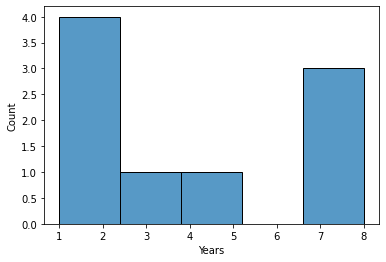

In [62]:
sns.histplot(employee.Years)

Most of the employees have been in the company 2.5 years or less. The is also 3 employees that have been 6.5 to 8 years

<AxesSubplot:xlabel='Salary', ylabel='Count'>

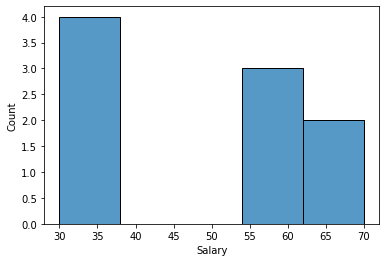

In [63]:
sns.histplot(employee.Salary)

In [14]:
employee.Years.max()

8

<AxesSubplot:xlabel='Years', ylabel='Count'>

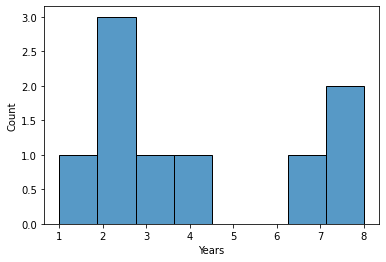

In [15]:
sns.histplot(employee.Years, bins = 8)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

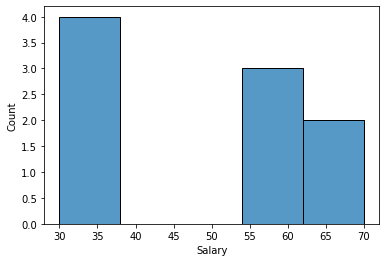

In [16]:
sns.histplot(employee.Salary)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

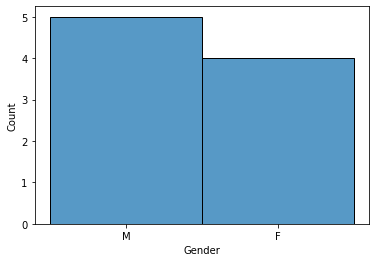

In [17]:
sns.histplot(employee.Gender)

#### What's the average salary in this company?

In [72]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [73]:
employee.Salary.max()

70

#### What's the lowest salary?

In [75]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [88]:
Poor_employees = employee.loc[employee['Salary'] == 30]
Poor_employees

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
Salary,30,30,30,30,30,30,30


#### Could you give all the information about an employee called David?

In [95]:
David_info = employee.loc[employee['Name'].isin("David")]
David_info

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

#### Could you give only David's salary?

In [23]:
# your answer here


#### Print all the rows where job title is associate

In [24]:
# your answer here

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [25]:
# your answer here- 1 method


In [26]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [27]:
# your answer here


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [28]:
# your answer here

####  What is the average Salary per title?

In [29]:
# your answer here

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [30]:
# draw boxplot here

In [31]:
# print first quartile here

In [32]:
# print third quartile here

#### Is the mean salary per gender different?

In [33]:
# your answer here

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [34]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [35]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [36]:
orders = pd.read_csv('./Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [38]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [39]:
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [40]:
orders.amount_spent.min()

0.0

In [41]:
orders.amount_spent.max()

168469.6

#### Select all the customers we have in Spain

In [42]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [43]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [44]:
# your answer here

#### Select orders from Spain that are above 50 items

In [45]:
# your answer here

#### Select all free orders

In [46]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [47]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [48]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [49]:
# your answer here

#### Select all orders made in the month of August

In [50]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [51]:
# your answer here

#### What's the  average amount of money spent by country

In [52]:
# your answer here

#### What's the most expensive item?

In [53]:
# your answer here

#### What was the average amount spent per year ?

In [54]:
# your answer here